In [79]:
import pickle
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
from ch_py import *
from ch_extra import *

from astropy.coordinates import match_coordinates_sky
from astropy import units as u
from astropy.coordinates import SkyCoord

#import seaborn as sns
#sns.set(context='talk',style='ticks',font='serif',palette='muted',rc={"xtick.direction":"in","ytick.direction":"in"})
%matplotlib inline

In [2]:
df=pd.read_csv('/Users/taweewat/Documents/xray_project/gaia/1474033627436A.csv')

In [3]:
df.head()

,angDist,ra_ep2000,dec_ep2000,errHalfMaj,errHalfMin,errPosAng,ra,dec,hip,tycho2_id,...,Jmag,Hmag,Kmag,e_Jmag,e_Hmag,e_Kmag,Qfl,Rfl,X,MeasureJD
0,0.072682,45.034148,0.235423,0.001,0.001,81,45.034330,0.235392,13989.0,NaN,...,6.606,6.133,6.019,0.023,0.024,0.020,AAA,111,0,2.451814e+06
1,0.112590,45.164965,0.200297,0.069,0.038,90,45.165007,0.200068,NaN,55-28-1,...,9.652,9.450,9.349,0.023,0.025,0.019,AAA,222,0,2.451814e+06
2,0.036050,45.086143,0.248832,0.029,0.016,90,45.086155,0.248825,NaN,55-1191-1,...,10.030,9.853,9.780,0.025,0.025,0.022,AAA,222,0,2.451814e+06
3,0.029111,45.066526,0.248288,0.031,0.017,90,45.066542,0.248211,NaN,55-624-1,...,10.174,9.917,9.875,0.022,0.025,0.025,AAA,222,0,2.451814e+06
4,0.169245,45.136037,0.335054,0.018,0.011,90,45.136038,0.335044,NaN,55-849-1,...,8.776,8.311,8.250,0.021,0.036,0.026,AAA,112,0,2.451814e+06


In [5]:
final=pd.read_csv('/Users/taweewat/Documents/xray_project/result/rosat-rad-final-01.csv',\
                    keep_default_na=False, na_values=[""])

In [80]:
ra_obj=np.array([210.258631,49.950416,356.18307,209.02268]) #Abelll, NGC1275, Pheonix, target
dec_obj=np.array([2.878468,41.51166,-42.720204,-34.35293])
objs=SkyCoord(ra=ra_obj*u.degree, dec=dec_obj*u.degree) 
idx_obj, d2d_obj, d3d_obj = objs.match_to_catalog_sky(df_c); print d2d_obj

cut2=final[(final['mir']+final['emir']>final.loc[idx_obj[2],'mir']-np.log10(3*3.)) &\
           (final['radio']+final['eradio']>final.loc[idx_obj[2],'radio']-np.log10(3*3.)) &\
           (final['xray']+final['exray']>final.loc[idx_obj[2],'xray']-np.log10(3))]

[u'0d00m02.7721s' u'0d00m06.2252s' u'0d00m03.9106s' u'0d00m14.1692s']


In [70]:
df_c = SkyCoord(ra=final['RA'].values*u.degree, dec=final['DEC'].values*u.degree)  
df_catalog = SkyCoord(ra=df['ra'].values*u.degree, dec=df['dec'].values*u.degree)  


df_cut2 = SkyCoord(ra=cut2['RA'].values*u.degree, dec=cut2['DEC'].values*u.degree)

In [71]:
idx, d2d, d3d = df_c.match_to_catalog_sky(df_catalog)  


idx_cut, d2d_cut, d3d_cut = df_cut2.match_to_catalog_sky(df_catalog)  

In [10]:
df.columns

Index([u'angDist', u'ra_ep2000', u'dec_ep2000', u'errHalfMaj', u'errHalfMin',
       u'errPosAng', u'ra', u'dec', u'hip', u'tycho2_id', u'solution_id',
       u'source_id', u'random_index', u'ref_epoch', u'ra_error', u'dec_error',
       u'parallax', u'parallax_error', u'pmra', u'pmra_error', u'pmdec',
       u'pmdec_error', u'ra_dec_corr', u'ra_parallax_corr', u'ra_pmra_corr',
       u'ra_pmdec_corr', u'dec_parallax_corr', u'dec_pmra_corr',
       u'dec_pmdec_corr', u'parallax_pmra_corr', u'parallax_pmdec_corr',
       u'pmra_pmdec_corr', u'astrometric_n_obs_al', u'astrometric_n_obs_ac',
       u'astrometric_n_good_obs_al', u'astrometric_n_good_obs_ac',
       u'astrometric_n_bad_obs_al', u'astrometric_n_bad_obs_ac',
       u'astrometric_delta_q', u'astrometric_excess_noise',
       u'astrometric_excess_noise_sig', u'astrometric_primary_flag',
       u'astrometric_relegation_factor', u'astrometric_weight_al',
       u'astrometric_weight_ac', u'astrometric_priors_used',
       u'matche

In [12]:
def abs_mag(mag,par):
    #1/par = unit kpc
    return mag-5.*np.log10((1./par)*1000./10.)

In [16]:
absJ=abs_mag(df.Jmag,df.parallax)
absK=abs_mag(df.Kmag,df.parallax)
absH=abs_mag(df.Hmag,df.parallax)
absG=abs_mag(df.phot_g_mean_mag,df.parallax)

In [81]:
sigma_G=2.5*np.log10((2.*df.phot_g_mean_flux_error+df.phot_g_mean_flux)/df.phot_g_mean_flux)
sigma_GK=sigma_G+df.e_Kmag

In [61]:
cri=np.array((df.parallax_error/df.parallax)<0.2) & np.array(sigma_GK<0.05) & np.array(sigma_G<0.05)

(12.0, -3.0)

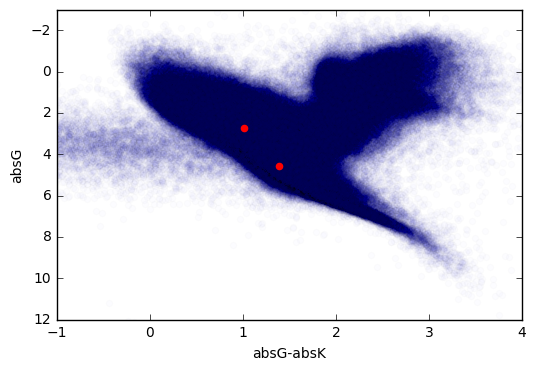

In [76]:
plt.scatter(absG[cri]-absK[cri],absG[cri],alpha=0.01)
plt.scatter(absG[idx_cut][criterion2]-absK[idx_cut][criterion2],absG[idx_cut][criterion2],color='red',alpha=1.0)
plt.xlabel('absG-absK')
plt.ylabel('absG')
plt.xlim(-1.0,4.0)
plt.ylim(12.0,-3.0)

(10.0, -5.0)

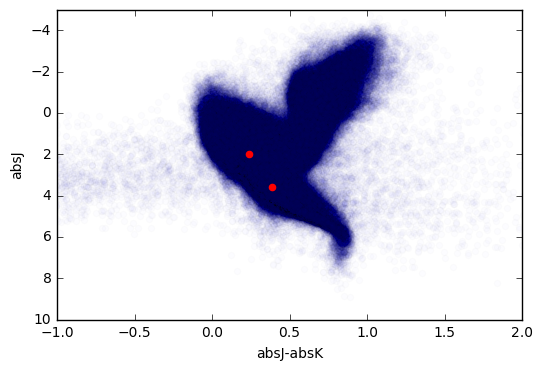

In [84]:
plt.scatter(absJ[cri]-absK[cri],absJ[cri],alpha=0.01)
plt.scatter(absJ[idx_cut][criterion2]-absK[idx_cut][criterion2],absJ[idx_cut][criterion2],color='red',alpha=1.0)
plt.xlabel('absJ-absK')
plt.ylabel('absJ')
plt.xlim(-1.0,2.0)
plt.ylim(10.0,-5.0)

In [85]:
dff=df.loc[idx_cut][criterion2]; dff

,angDist,ra_ep2000,dec_ep2000,errHalfMaj,errHalfMin,errPosAng,ra,dec,hip,tycho2_id,...,Jmag,Hmag,Kmag,e_Jmag,e_Hmag,e_Kmag,Qfl,Rfl,X,MeasureJD
1333481,0.026263,69.409995,-29.904051,0.001,0.001,83,69.410064,-29.904437,21550.0,NaN,...,7.218,7.063,6.979,0.018,0.029,0.029,AAA,111,0,2.451169e+06
307339,0.164327,221.880925,34.917090,0.013,0.011,0,221.880788,34.916901,NaN,2557-56-1,...,10.411,10.082,10.022,0.022,0.020,0.018,AAA,222,0,2.450897e+06


In [109]:
1./dff.parallax*1000.

1333481    111.731844
307339     233.644860
Name: parallax, dtype: float64

In [111]:
dff.parallax_error/dff.parallax

1333481    0.034637
307339     0.063084
dtype: float64

In [ ]:
plt.scatter(df.Jmag-df.Kmag,df.Jmag,alpha=0.01)
plt.errorbar(dff.Jmag-dff.Kmag,dff.Jmag,fmt='o',alpha=0.1)
plt.xlabel('J-K')
plt.ylabel('J')

In [113]:
cut2[criterion2]

,ra,dec,xc,exc,hr1,ehr1,hr2,ehr2,dec_radio,df_radio,...,rad_f,erad_f,xray,mir,radio,exray,emir,eradio,RA,DEC
7247,69.40666,-29.90306,0.1096,0.02396,0.42,0.20,0.15,0.25,-29.901806,47.8,...,8.232893e-24,4.780000e-25,-3.772795,1.174496,2.848022,0.099270,0.039365,0.038571,69.404268,-29.902433
8716,221.88625,34.91875,0.2571,0.02462,-0.70,0.06,-0.29,0.23,34.918611,0.6,...,1.580000e-25,6.000000e-27,-3.578503,1.520496,0.955127,0.046472,0.023428,0.026533,221.886896,34.918681


(array([ 17.,  19.,  18.,  25.,  31.,  24.,  19.,  26.,  16.,  19.]),
 array([  0.77747037,   3.69172321,   6.60597605,   9.5202289 ,
         12.43448174,  15.34873458,  18.26298742,  21.17724026,
         24.09149311,  27.00574595,  29.91999879]),
 <a list of 10 Patch objects>)

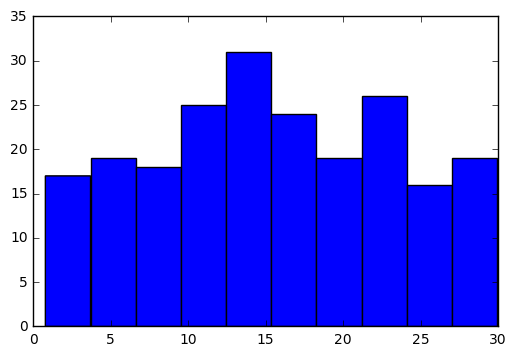

In [114]:
plt.hist(d2d[d2d<30.*u.arcsecond].to(u.arcsecond))

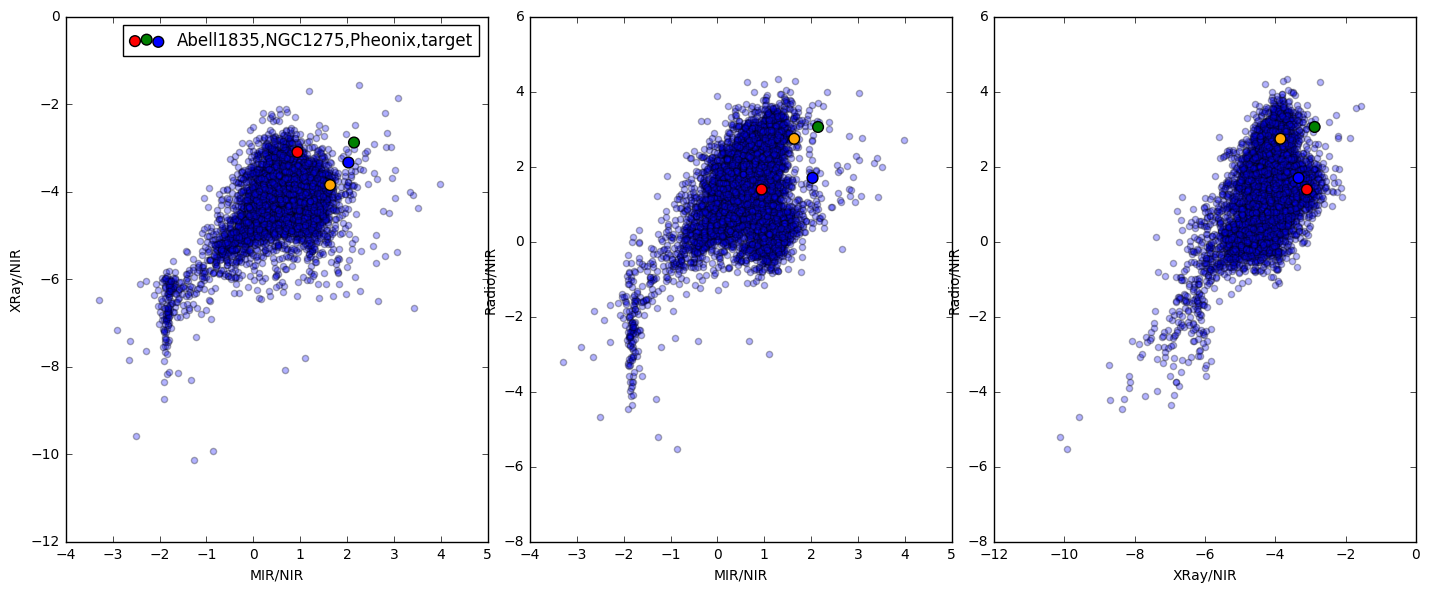

In [88]:
fig, ax = plt.subplots(1, 3, figsize=(15,7))#, sharex="col", sharey="row")
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.2, top=0.95,hspace=0.1, wspace=0.1)

mir=final['mir'].values
xray=final['xray'].values
radio=final['radio'].values

color=['red','green','blue','orange']
point=ax[0].scatter(mir,xray,alpha=0.3)
ax[0].scatter(final.loc[idx_obj,'mir'],final.loc[idx_obj,'xray'],alpha=1.0,c=color,label='Abell1835,NGC1275,Pheonix,target',s=60.0)
ax[0].set_xlabel('MIR/NIR')
ax[0].set_ylabel('XRay/NIR')
ax[0].legend(loc='best')

point=ax[1].scatter(mir,radio,alpha=0.3)
ax[1].scatter(final.loc[idx_obj,'mir'],final.loc[idx_obj,'radio'],alpha=1.0,c=color,label='Abell1835',s=60.0)
ax[1].set_xlabel('MIR/NIR')
ax[1].set_ylabel('Radio/NIR')

point=ax[2].scatter(xray,radio,alpha=0.3)
ax[2].scatter(final.loc[idx_obj,'xray'],final.loc[idx_obj,'radio'],alpha=1.0,c=color,label='Abell1835',s=60.0)
ax[2].set_xlabel('XRay/NIR')
ax[2].set_ylabel('Radio/NIR')

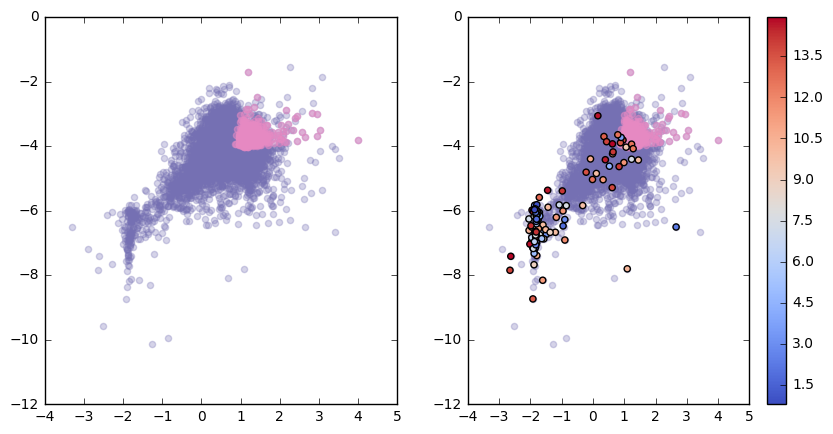

In [89]:
criterion=d2d<15.*u.arcsecond
fig, ax = plt.subplots(1,2,figsize=(10,5))

point=ax[0].scatter(mir,xray,color='#7570b3',alpha=0.3,s=20)
ax[0].scatter(cut2['mir'],cut2['xray'],alpha=0.5,color='#e78ac3',s=20)


ax[1].scatter(mir,xray,color='#7570b3',alpha=0.3)
ax[1].scatter(cut2['mir'],cut2['xray'],alpha=0.5,color='#e78ac3',s=20)
cax=ax[1].scatter(mir[criterion],xray[criterion],alpha=1.0,c=d2d[criterion].to(u.arcsecond),cmap=cm.coolwarm)
cbar = fig.colorbar(cax)

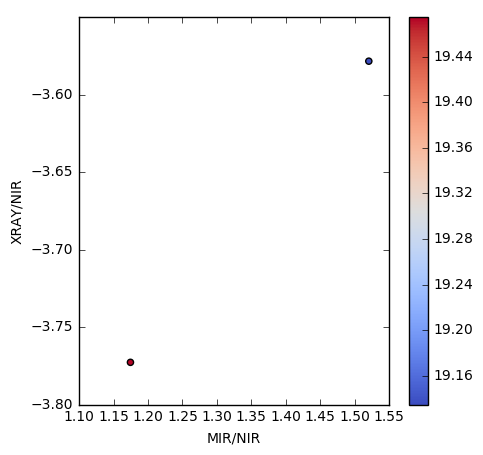

In [115]:
criterion2=d2d_cut<(30.*u.arcsecond)
fig, ax = plt.subplots(figsize=(5,5))
cax=ax.scatter(cut2['mir'][criterion2],cut2['xray'][criterion2],alpha=1.0,c=d2d_cut[criterion2].to(u.arcsecond),cmap=cm.coolwarm)
cbar = fig.colorbar(cax)
ax.set_xlabel('MIR/NIR')
ax.set_ylabel('XRAY/NIR')

In [117]:
print cut2[criterion2]['RA']
print cut2[criterion2]['DEC']

7247     69.404268
8716    221.886896
Name: RA, dtype: float64
7247   -29.902433
8716    34.918681
Name: DEC, dtype: float64


In [99]:
print 'The difference for the matches in GAIA catalog'
print d2d_cut[criterion2].to(u.arcsecond) 

The difference for the matches in GAIA catalog
[u'19.4747arcsec' u'19.1349arcsec']
